#Импорт библиотек

In [ ]:
import sys
python = sys.executable # get python executable path
print(python)

for i in ["numpy",  "scipy", "matplotlib", "pandas", "opencv-python", "opencv-contrib-python"]: # declare what packages we need
  print(f"Installing: {i}")
  ! $python -m pip install $i # install packages calling bash command from the notebook, e.g. "/usr/bin/python -m pip install numpy"

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import cv2
import urllib3

/usr/bin/python3
Installing: numpy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: scipy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: matplotlib
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: pandas
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: opencv-python
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: opencv-contrib-python
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import copy

# Загрузка изображения

In [ ]:
url = "https://cs7.pikabu.ru/images/previews_comm/2019-08_6/1566921987132784016.jpg"
urllib.request.urlretrieve(url, "image.jpg")
!ls


image.jpg  sample_data


# Задание 1 Чтение и отображение

In [ ]:
img = cv2.imread("image.jpg") #Для чтения изображения используем функцию библиотеки cv2
print(img)

[[[74 60 48]
  [73 59 47]
  [73 60 46]
  ...
  [83 97 91]
  [78 92 86]
  [74 88 82]]

 [[77 63 51]
  [76 63 49]
  [74 61 47]
  ...
  [83 97 91]
  [80 94 88]
  [77 91 85]]

 [[76 63 49]
  [74 61 47]
  [70 59 45]
  ...
  [81 97 90]
  [80 96 89]
  [79 95 88]]

 ...

 [[31 36 35]
  [19 24 23]
  [ 6 11 10]
  ...
  [ 0  2  3]
  [ 3  2  4]
  [ 3  0  2]]

 [[31 36 35]
  [19 24 23]
  [ 6 11 10]
  ...
  [ 2  1  3]
  [ 5  2  4]
  [ 3  0  2]]

 [[31 36 35]
  [19 24 23]
  [ 6 11 10]
  ...
  [ 2  1  3]
  [ 5  2  4]
  [ 3  0  2]]]


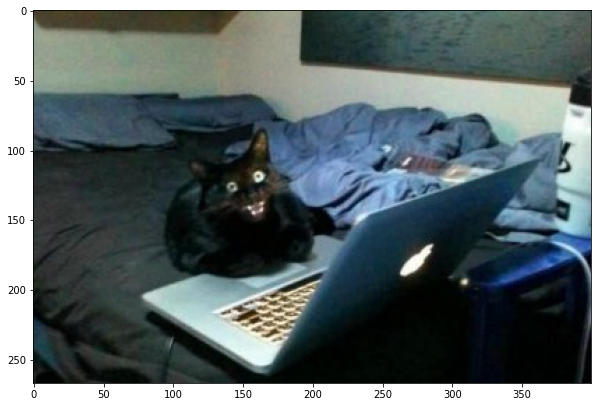

In [ ]:
#Вывод изображения
fig = plt.figure(figsize = (10, 10))
plt.imshow(img)
plt.show()
#Изображение выведено не коректно, т.к. оно имеет формат BGR

In [ ]:
#Приведение изображения к формату RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img)

[[[48 60 74]
  [47 59 73]
  [46 60 73]
  ...
  [91 97 83]
  [86 92 78]
  [82 88 74]]

 [[51 63 77]
  [49 63 76]
  [47 61 74]
  ...
  [91 97 83]
  [88 94 80]
  [85 91 77]]

 [[49 63 76]
  [47 61 74]
  [45 59 70]
  ...
  [90 97 81]
  [89 96 80]
  [88 95 79]]

 ...

 [[35 36 31]
  [23 24 19]
  [10 11  6]
  ...
  [ 3  2  0]
  [ 4  2  3]
  [ 2  0  3]]

 [[35 36 31]
  [23 24 19]
  [10 11  6]
  ...
  [ 3  1  2]
  [ 4  2  5]
  [ 2  0  3]]

 [[35 36 31]
  [23 24 19]
  [10 11  6]
  ...
  [ 3  1  2]
  [ 4  2  5]
  [ 2  0  3]]]


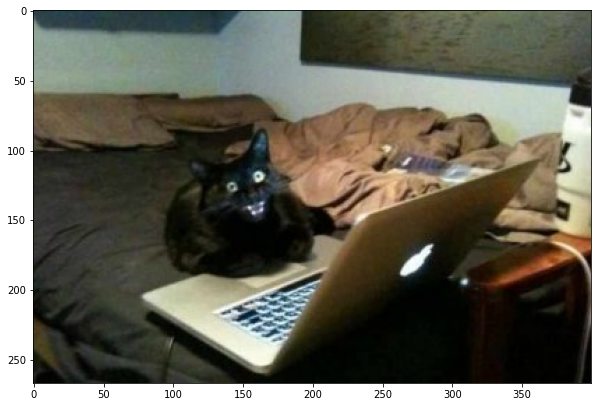

In [ ]:
#Теперь все выводится коректно
fig = plt.figure(figsize = (10, 10))
plt.imshow(img)
plt.show()

In [ ]:
#Подготовим изображение для отображения каждого канала цвета
red_color = img[:, :, 0]
green_color = img[:, :, 1]
blue_color = img[:, :, 2]

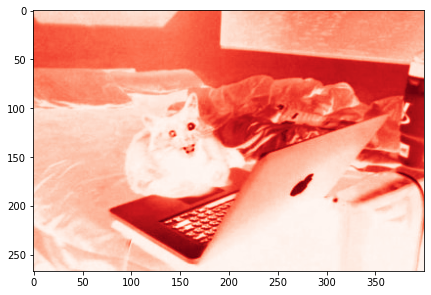

In [ ]:
#Отобразим красный канал
fig = plt.figure(figsize = (7, 7))
plt.imshow(red_color, cmap='Reds')
plt.show()

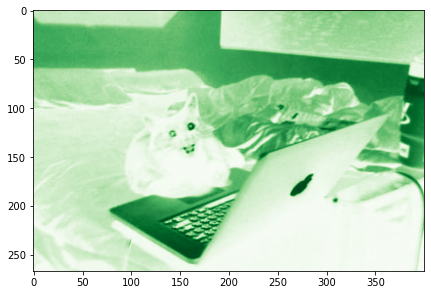

In [ ]:
#Отобразим зеленый канал
fig = plt.figure(figsize = (7, 7))
plt.imshow(green_color, cmap='Greens')
plt.show()

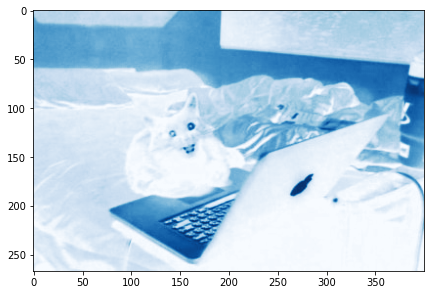

In [ ]:
#Отобразим синий канал
fig = plt.figure(figsize = (7, 7))
plt.imshow(blue_color, cmap='Blues')
plt.show()

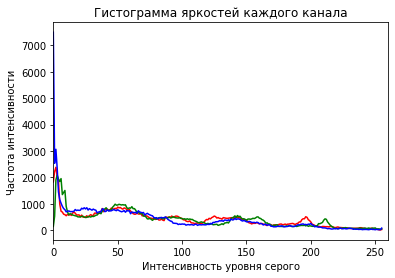

In [ ]:
# Гистограмма яркостей каждого канала
color = ("r", "g", "b")
for i, color in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.title("Гистограмма яркостей каждого канала")
    plt.xlabel("Интенсивность уровня серого")
    plt.ylabel("Частота интенсивности")
    plt.plot(hist, color = color)
    plt.xlim([0, 260])
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

# Задание 2 Добавление границы

In [ ]:
#Реализуем функцию, добавляющую изображению границу.
def add_border(image , border_size, method):
  if method == 'mirror': #Для добавления зеркальной границы используем функцию из библиотеки cv2
    img_with_border = cv2.copyMakeBorder(image, border_size, border_size, border_size, border_size, cv2.BORDER_REFLECT)
  if method == 'copy': #Для добавления дублирующей границы используем функцию из библиотеки cv2
    img_with_border = cv2.copyMakeBorder(image, border_size, border_size, border_size, border_size, cv2.BORDER_REPLICATE)
  if method == 'color': #Добавления границы определенного цвета
    new_img = copy.deepcopy(image) #Используем deepcopy для того, чтобы исходное изображение не изменялось после вызова функции
    new_width = new_img.shape[0] + 2 * border_size # Расчитываем ширину прямоугольника
    new_height = new_img.shape[1] + 2 * border_size # Расчитываем высоту прямоугольника
    img_with_border = cv2.rectangle(new_img, (0, 0), (new_img.shape[1], new_img.shape[0]), ([ 75., 0.,  130.]), border_size) # Cоздаем новое изображение с границей
  return img_with_border

In [ ]:
img_mirror = add_border(img, 30, 'mirror')
img_copy = add_border(img, 40, 'copy')
img_color = add_border(img, 20, 'color')

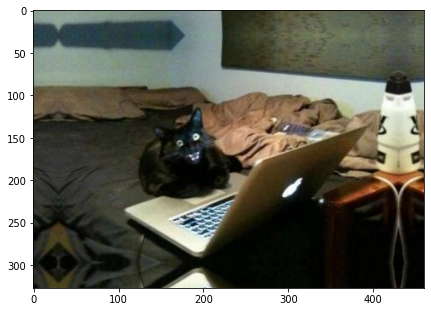

In [ ]:
fig = plt.figure(figsize = (7, 7))
plt.imshow(img_mirror)
plt.show()

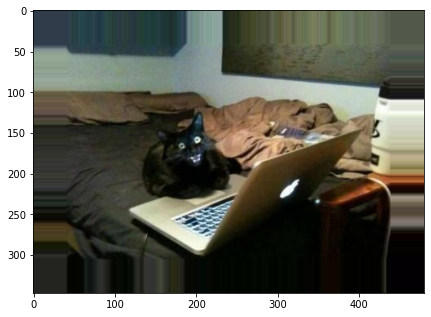

In [ ]:
fig = plt.figure(figsize = (7, 7))
plt.imshow(img_copy)
plt.show()

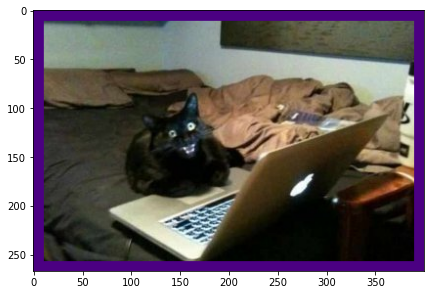

In [ ]:
fig = plt.figure(figsize = (7, 7))
plt.imshow(img_color)
plt.show()

# Задание 3 RGB  -> GRAY

In [ ]:
#Имплементируем простой метод:
simple_gray = []
for i in range(len(img)):
  av = (red_color[i] + blue_color[i] + green_color[i]) / 3
  simple_gray.append(av)

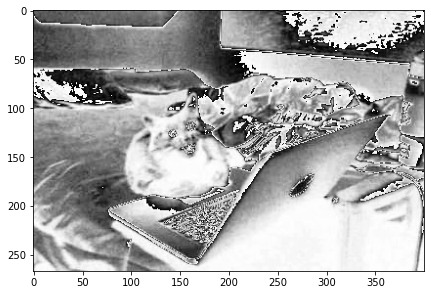

In [ ]:
fig = plt.figure(figsize = (7, 7))
plt.imshow(simple_gray, cmap='Greys')
plt.show()

In [ ]:
#Имплиентируем метод с коэффициентами:
koef_grey = []
for i in range(len(img)):
  k = 0.299 * red_color[i] + 0.144 * blue_color[i] + 0.587 * green_color[i]
  koef_grey.append(k)

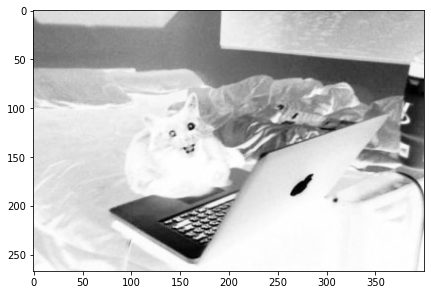

In [ ]:
fig = plt.figure(figsize = (7, 7))
plt.imshow(koef_grey, cmap='Greys')
plt.show()

In [ ]:
#Используем встроенную функцию opencv
img_cv2_grey = []
img_cv2_grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

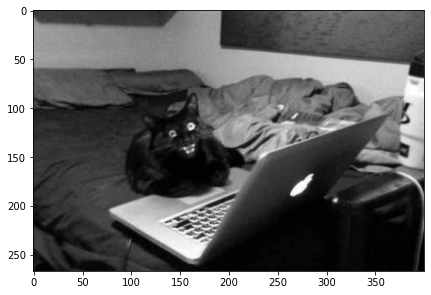

In [ ]:
fig = plt.figure(figsize = (7, 7))
plt.imshow(img_cv2_grey, cmap='gray')
plt.show()

# Задание 4 Манипуляция с пикселями

In [ ]:
#Реализуем функцию меняющую определенный канал цвета
def shift_image(image, channel, val):
    img_shift = copy.deepcopy(image) #Используем deepcopy для того, чтобы исходное изображение не изменялось после вызова функции
    img_shift[:, :, channel] = np.dot(img_shift[:, :, channel], val) #Используем скалярное произведение
    print(np.max(img_shift)) #Проверяем, что максимальное значение не превышает 255
    return img_shift

In [ ]:
img_1 = shift_image(img, 2, 0)
img_2 = shift_image(img, 1, 2)
img_3 = shift_image(img, 0, 3)

255
255
255


<function matplotlib.pyplot.show(close=None, block=None)>

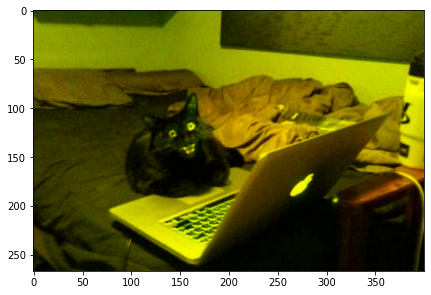

In [ ]:
fig = plt.figure(figsize = (7, 7))
plt.imshow(img_1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

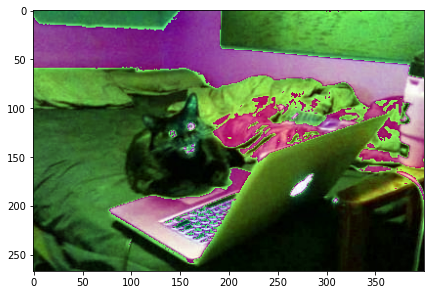

In [ ]:
fig = plt.figure(figsize = (7, 7))
plt.imshow(img_2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

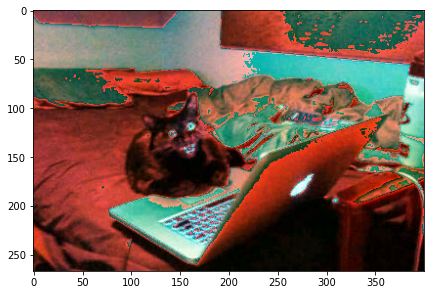

In [ ]:
fig = plt.figure(figsize = (7, 7))
plt.imshow(img_3)
plt.show

In [ ]:
#Реализуем функцию, которая вырезает часть изображения по координатам и заменяет ее на константный цвет
def get_rect(image, rect_coord: list, color: tuple):
  img_without_rect = copy.deepcopy(image) #Используем deepcopy для того, чтобы исходное изображение не изменялось после вызова функции
  cut_img = copy.deepcopy(img_without_rect[rect_coord[0][0]:rect_coord[1][0], rect_coord[0][1]:rect_coord[1][1]]) # Сохраняем прямоугольник по координатам
  img_without_rect[rect_coord[0][0]:rect_coord[1][0], rect_coord[0][1]:rect_coord[1][1]] = color # Заменяем этот прямоугольник цветом
  return img_without_rect, cut_img

In [ ]:
img_without_rect, cut_img = get_rect(img, [(90, 100),(210, 200)], ([ 250., 250.,  0.]))

<function matplotlib.pyplot.show(close=None, block=None)>

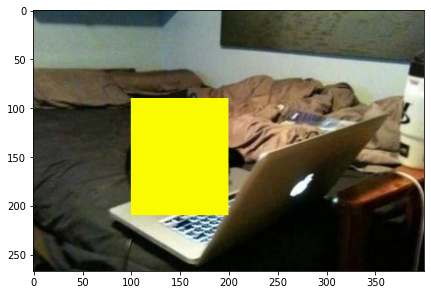

In [ ]:
#Отобразим изображение без выбранного прямоугольника
fig = plt.figure(figsize = (7, 7))
plt.imshow(img_without_rect)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

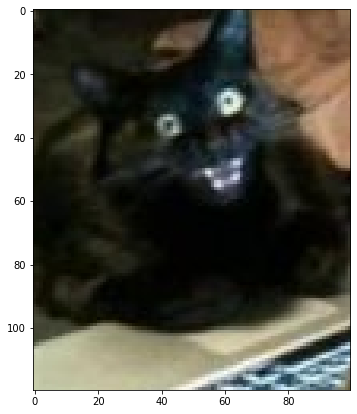

In [ ]:
#Отобразим выбранный прямоугольник
fig = plt.figure(figsize = (7, 7))
plt.imshow(cut_img)
plt.show

# Задание 5 RGB -> HSV

In [ ]:
img_HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV) #Переведем изображение в формат HSV, используя встроенную функцию

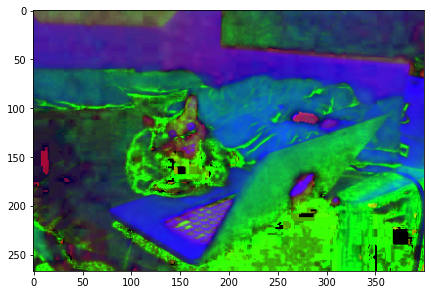

In [ ]:
#Отобразим полученное изображение
fig = plt.figure(figsize = (7, 7))
plt.imshow(img_HSV)
plt.show()

In [ ]:
img_HSV_shift = shift_image(img_HSV, 0, 2) # Используем на полученном изображении функцию shift_image

255


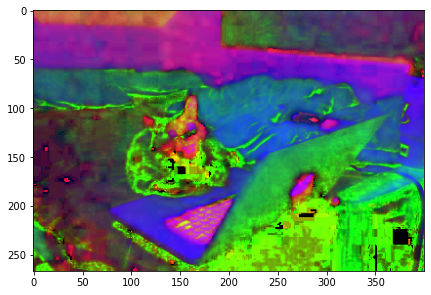

In [ ]:
#Отобразим преобразованное изображение
fig = plt.figure(figsize = (7, 7))
plt.imshow(img_HSV_shift)
plt.show()

In [ ]:
new_img_RGB = cv2.cvtColor(img_HSV_shift, cv2.COLOR_HSV2RGB) #Переведем преобразованное изображение в формат RGB, используя встроенную функцию

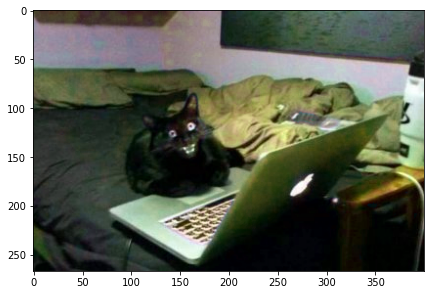

In [ ]:
#Отобразим изображение
fig = plt.figure(figsize = (7, 7))
plt.imshow(new_img_RGB)
plt.show() #На изображении заметно преобразованние красного канала